In [4]:
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import pydataset

import wrangle
import env

In [5]:
df = wrangle.wrangle_telco()

In [6]:
df.head()

,monthly_charges,tenure,Two year,total_charges
1793,90.45,65,1,5879.25
1794,45.20,54,1,2440.80
1795,45.05,56,1,2522.80
1796,39.40,20,1,788.00
1797,85.15,72,1,6130.80


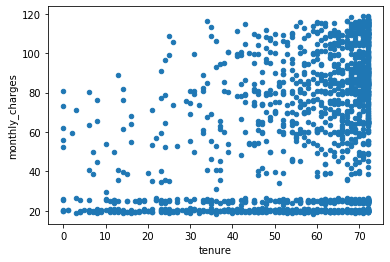

In [7]:
df.plot.scatter(y='monthly_charges', x='tenure')

In [8]:
train_and_validate, test = train_test_split(df, test_size=.12, random_state=123)
train, validate = train_test_split(train_and_validate, test_size=.12, random_state=123)

train.shape, test.shape, validate.shape

((1312, 4), (204, 4), (179, 4))

In [9]:
scaler = sklearn.preprocessing.MinMaxScaler()


In [10]:
scaler.fit(train[['monthly_charges', 'tenure', 'total_charges']])


MinMaxScaler(copy=True, feature_range=(0, 1))

In [12]:
train[['monthly_charges', 'tenure', 'total_charges']] = scaler.transform(train[['monthly_charges', 'tenure', 'total_charges']])
test[['monthly_charges', 'tenure', 'total_charges']] = scaler.transform(test[['monthly_charges', 'tenure', 'total_charges']])
validate[['monthly_charges', 'tenure', 'total_charges']] = scaler.transform(validate[['monthly_charges', 'tenure', 'total_charges']])

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [14]:
train.head()

,monthly_charges,tenure,Two year,total_charges
6877,0.005486,0.222222,1,0.035627
6768,0.066833,0.902778,1,0.191707
5409,0.854364,0.861111,1,0.758025
1935,0.665337,0.763889,1,0.549974
2344,0.605486,0.986111,1,0.659910
